Nama : Rondi <br>
ID Kegiatan : 2487820 <br>
AI GAME




#Instalasi Library

In [ ]:
!pip install varname

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Library

In [ ]:
import nltk
import pandas as pd
import re
import tensorflow as tf
import time
import multiprocessing
import io
import gensim 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
import keras 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings
warnings.filterwarnings("ignore") # Untuk Mengabaikan Warnings

# Load Data

In [3]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd #PANDAS DATA SCIENCE
df = pd.read_csv("/content/drive/My Drive/Dataset/dataset_tv.csv")

df.head(5)

,Id,Sentiment,Acara_TV,Jumlah Retweet,Text_Tweet
0,1,positive,HitamPutihTransTV,12,This black and white television program is ver...
1,2,neutral,HitamPutihTransTV,6,just the same
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
df.dropna(axis=0, subset=['Text_Tweet','Sentiment'], inplace=True)
df.head()

,Id,Sentiment,Acara_TV,Jumlah Retweet,Text_Tweet
0,1,positive,HitamPutihTransTV,12,This black and white television program is ver...
1,2,neutral,HitamPutihTransTV,6,just the same
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
#Pengubahan dataset kedalam bentuk DATA FRAME
dframe=pd.read_csv("/content/drive/My Drive/Dataset/dataset_tv.csv")
print(dframe[:4])
#print(dframe)

   Id Sentiment           Acara_TV  Jumlah Retweet  \
0   1  positive  HitamPutihTransTV              12   
1   2   neutral  HitamPutihTransTV               6   
2   3  positive  HitamPutihTransTV               9   
3   4  positive  HitamPutihTransTV               2   

                                          Text_Tweet  
0  This black and white television program is ver...  
1                                      just the same  
2  Ada nih di trans7 hitam putih, dia dpt penghar...  
3        selamat ya mas @adietaufan masuk hitamputih  


In [ ]:
#Mengambil data dari satu kolom/frame
data_riview = dframe['Text_Tweet']
print (data_riview[:4])

0    This black and white television program is ver...
1                                        just the same
2    Ada nih di trans7 hitam putih, dia dpt penghar...
3          selamat ya mas @adietaufan masuk hitamputih
Name: Text_Tweet, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train,X_test, y_train, y_test = train_test_split(df['Text_Tweet'],df['Sentiment'],train_size=0.8,random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() #PANGGIL MODEL NB
nb.fit(X_train,y_train) #TRAINING DATA
y_pred = nb.predict(X_test) #PREDIKSI DATA X_TEST

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(y_pred, y_test))
confusion_matrix(y_pred,y_test)

0.75


array([[24,  4,  5],
       [ 0,  4,  0],
       [ 7,  4, 32]])

In [ ]:
X_train, X_test, y_train, Y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(360, 250) (360, 3)
(40, 250) (80,)


In [ ]:
df.shape

(400, 5)

In [ ]:
df.isnull().sum()

Id                0
Sentiment         0
Acara_TV          0
Jumlah Retweet    0
Text_Tweet        0
dtype: int64

In [ ]:
df.head()

,Id,Sentiment,Acara_TV,Jumlah Retweet,Text_Tweet
0,1,positive,HitamPutihTransTV,12,This black and white television program is ver...
1,2,neutral,HitamPutihTransTV,6,just the same
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
Y = pd.get_dummies(df['Sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (400, 3)


In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="Linear")


In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [ ]:
df["Sentiment"].value_counts()

positive    187
negative    157
neutral      56
Name: Sentiment, dtype: int64

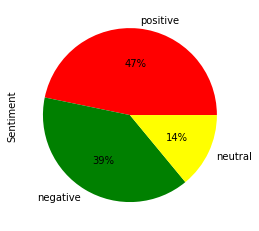

In [ ]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green", "yellow"])

In [ ]:
df["Acara_TV"].value_counts()

HitamPutihTransTV            100
IndonesiaLawyersClubTvOne    100
MataNajwaMetroTV              89
KickAndyMetroTV               77
PagiPagiAmbyar                34
Name: Acara_TV, dtype: int64

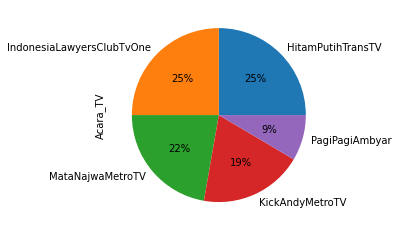

In [ ]:
df["Acara_TV"].value_counts().plot(kind='pie', autopct='%1.0f%%')

Text(0.5, 1.0, 'Sentiments Accumulations in each class')

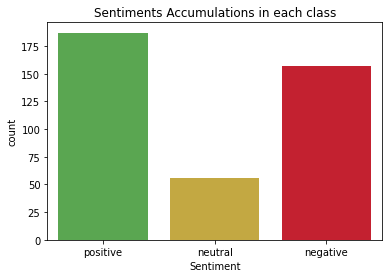

In [ ]:
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.Sentiment, palette=['#4fb443',"#d9b42c", "#de061a"])
plt.title("Sentiments Accumulations in each class")

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Text Processing

## Lowercase and Removing

In [ ]:
df.Text_Tweet[0]

'This black and white television program is very good, and very entertaining, to accompany my daily activities, especially after work. keep working for trans tv. good luck for the future.'

In [ ]:
import re
txt = df.Text_Tweet[0]
text=re.sub("[^a-zA-Z]"," ",txt) #mengganti setiap karakter selain huruf, dengan spasi
text=text.lower()

In [ ]:
text

'this black and white television program is very good  and very entertaining  to accompany my daily activities  especially after work  keep working for trans tv  good luck for the future '

## Tokenizing & Stopwords

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

from nltk.corpus import stopwords 
text=nltk.word_tokenize(text) # pisahkan kata dengan word_tokenize

In [ ]:
text = [w for w in text if not w in stopwords.words('english')]

In [ ]:
len(text)

18

In [ ]:
text

['black',
 'white',
 'television',
 'program',
 'good',
 'entertaining',
 'accompany',
 'daily',
 'activities',
 'especially',
 'work',
 'keep',
 'working',
 'trans',
 'tv',
 'good',
 'luck',
 'future']

## Lematization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'black white television program good entertaining accompany daily activity especially work keep working trans tv good luck future'

In [ ]:
text_list=[]
for i in df.Text_Tweet:
    text=re.sub("[^a-zA-Z]",
                " ",
                i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text = [w for w in text if not w in stopwords.words('english')]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [ ]:
text_list

['black white television program good entertaining accompany daily activity especially work keep working trans tv good luck future',
 '',
 'ada nih di trans hitam putih dia dpt penghargaan juga di norwegia hitamputih',
 'selamat ya ma adietaufan masuk hitamputih',
 'asiknya nonton hitam putih trans',
 'trans acara paling komplit dan menarik apalagi ada hitam putih',
 'hitam putih inspiratif banget',
 'suka banget dengan acara hitam putih',
 'keren lu bro hitamputihtrans',
 'tadi ada yg liat hitam putih di trans ga ada sanggu ganteng',
 'cinta mengikat silaturahmi di hati lunamaya hitamputihtrans http www instagram com p btqszj jo',
 'terima kasih pak sudah mau membantu kami untuk menyekolahkan adik saya hitamputihtrans',
 'semoga lancar hitamputihtrans',
 'trans hitam putih terbaik http www instagram com p btyytxmgvkd',
 'acara hitam putih paling bagus buat di lihat',
 'trans undang da rafly di acara hitam putih ya dia jebolan dangdut academi pinter nyanyi lagu india suaranya keren',
 

## Vektorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=20000  # a random value that we specify as the size of the bag of words
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray() # vectorization
all_words=cou_vec.get_feature_names() # bag of words
print(np.amax(sparce_matrix))

4


In [ ]:
words = pd.DataFrame(sparce_matrix,columns=all_words)

## Wordcloud

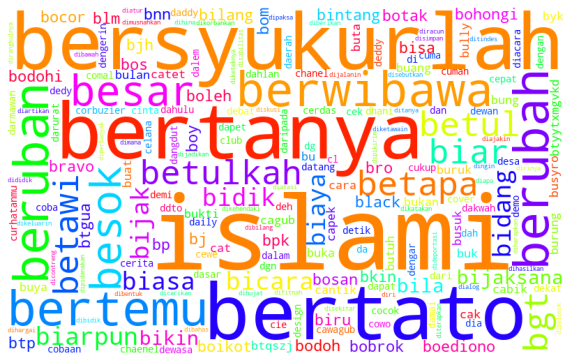

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(width=800,
                     height=500,
                     background_color="white",
                     colormap="hsv",
                     random_state=42).generate(" ".join(all_words[200:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Define X dan Y

In [ ]:
X=sparce_matrix
y=df.iloc[:,1].values

## Split Train Data & Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("Akurasi Logistic Regression: ",lr.score(X_test,y_test))

Akurasi Logistic Regression:  0.7125


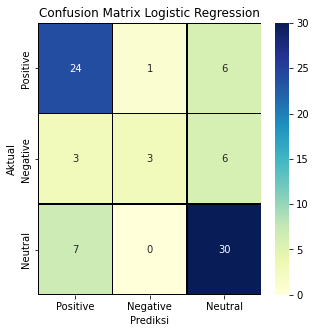

In [ ]:
#confussion matrix
y_pred_lr=lr.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_lr)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Logistic Regression")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=150)
dt.fit(X_train, y_train)
print("Akurasi Decision Tree: ",dt.score(X_test,y_test))

Akurasi Decision Tree:  0.6625


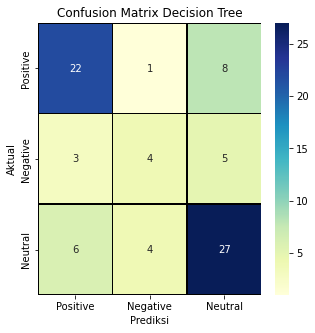

In [ ]:
#confussion matrix
y_pred_dt=dt.predict(X_test)
y_true=y_test
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_dt)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Decision Tree")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,
                            max_depth=200)
rf.fit(X_train, y_train)
print("Akurasi Random Forest: ",rf.score(X_test,y_test))

Akurasi Random Forest:  0.6625


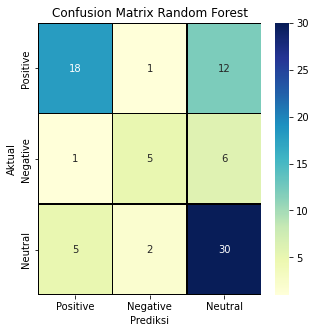

In [ ]:
#confussion matrix
y_pred_rf=rf.predict(X_test)
y_true=y_test
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_rf)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Random Forest")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                17300     
                                                                 
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 9)                 99        
                                                                 
Total params: 17,509
Trainable params: 17,509
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(df['Sentiment']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (400, 3)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text_Tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


X = tokenizer.texts_to_sequences(df['Text_Tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
y = pd.get_dummies(df['Sentiment']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (400, 3)


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(360, 250) (360, 3)
(40, 250) (40, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
9/9 [==============================] - 6s 488ms/step - loss: 1.0688 - accuracy: 0.4444 - val_loss: 1.0388 - val_accuracy: 0.4028
Epoch 2/10
9/9 [==============================] - 3s 328ms/step - loss: 0.9538 - accuracy: 0.4861 - val_loss: 0.9889 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 3s 330ms/step - loss: 0.9075 - accuracy: 0.7188 - val_loss: 0.9691 - val_accuracy: 0.4861
Epoch 4/10
9/9 [==============================] - 3s 342ms/step - loss: 0.8204 - accuracy: 0.6667 - val_loss: 0.9194 - val_accuracy: 0.6944
Epoch 5/10
9/9 [==============================] - 3s 332ms/step - loss: 0.6564 - accuracy: 0.7917 - val_loss: 0.9337 - val_accuracy: 0.6250
Epoch 6/10
9/9 [==============================] - 3s 328ms/step - loss: 0.4511 - accuracy: 0.8958 - val_loss: 0.7082 - val_accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 3s 331ms/step - loss: 0.2625 - accuracy: 0.8924 - val_loss: 0.7293 - val_accuracy: 0.6806
Epoch 8/10
9/9 [====

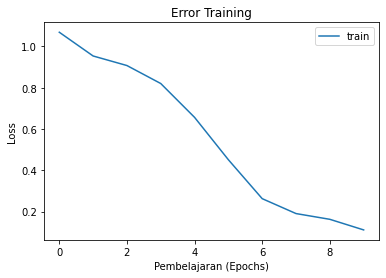

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.title('Error Training')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

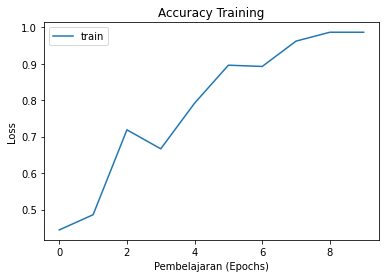

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy Training')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

In [ ]:
y_nn = model.predict(X_test)
y_nn[:5]

array([[0.02243464, 0.01237981, 0.9651855 ],
       [0.8786111 , 0.05287518, 0.06851366],
       [0.00683273, 0.00749748, 0.9856698 ],
       [0.78414035, 0.02945372, 0.18640593],
       [0.18637797, 0.03854134, 0.77508074]], dtype=float32)

In [ ]:
testing = model.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 0s 31ms/step - loss: 0.7291 - accuracy: 0.6250


In [ ]:
testing

[0.7291103601455688, 0.625]

In [ ]:
akurasi_nn = testing[1:2]

In [ ]:
print("Akurasi Neural Network: ",akurasi_nn)

Akurasi Neural Network:  [0.625]


# Consulation

Model | Akurasi Model
--|--
Logistic Regression | 71,25%
Decision Tree | 66,25%
Random Forest | 66,25%
Neural Network |62,50%


